<a href="https://colab.research.google.com/github/hxrshbhullar/Churn_Project/blob/main/Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/netflix_users.csv")
# Getting an overview of the data here
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [ ]:
# Checking the null values and the dtype of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

In [ ]:
df.describe()

,User_ID,Age,Watch_Time_Hours,Last_Login
count,25000.000000,25000.000000,25000.000000,25000
mean,12500.500000,46.482880,500.468858,2024-09-07 03:44:48.768000
min,1.000000,13.000000,0.120000,2024-03-08 00:00:00
25%,6250.750000,29.000000,256.567500,2024-06-07 00:00:00
50%,12500.500000,46.000000,501.505000,2024-09-07 00:00:00
75%,18750.250000,63.000000,745.732500,2024-12-09 00:00:00
max,25000.000000,80.000000,999.990000,2025-03-08 00:00:00
std,7217.022701,19.594861,286.381815,NaN


# RFM Features

## Recency `Days_since_login` (RFM)

Since our dataset does not have a dedicated churn column, we need to make one using the avaiable data.

**My Approach: from the max date in the `Last_Login`, we can subtract all other dates to get `Days_Last_Login`. Now we can set a threshold based on our business domain (i.e., 30/60/90 days etc)**

In [ ]:
# Creating Days_Last_Login column
df['Weeks_since_login'] = (max(df['Last_Login']) - df['Last_Login'])
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Weeks_since_login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,300 days
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,31 days
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,43 days
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,348 days
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,53 days


In [ ]:
df['Weeks_since_login'] = df['Weeks_since_login'].dt.days # Access Number of Days from timedelta64 dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User_ID            25000 non-null  int64         
 1   Name               25000 non-null  object        
 2   Age                25000 non-null  int64         
 3   Country            25000 non-null  object        
 4   Subscription_Type  25000 non-null  object        
 5   Watch_Time_Hours   25000 non-null  float64       
 6   Favorite_Genre     25000 non-null  object        
 7   Last_Login         25000 non-null  datetime64[ns]
 8   Weeks_since_login  25000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.7+ MB


/tmp/ipython-input-3734977317.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


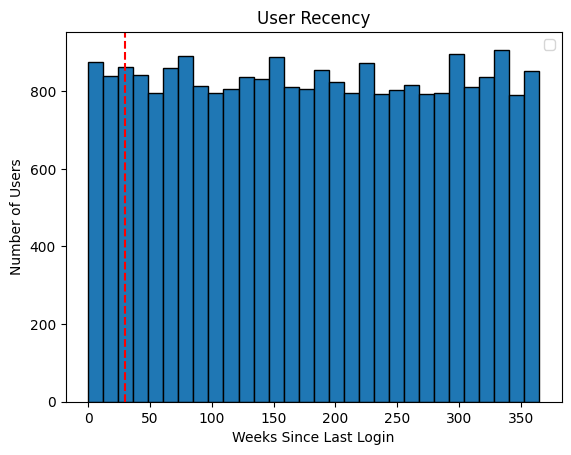

In [ ]:
# Setting the threeshold by checking the activity period using a plot
plt.hist(df['Weeks_since_login'], bins = 30, edgecolor = 'black')
plt.xlabel('Weeks Since Last Login')
plt.ylabel('Number of Users')
plt.title('User Recency')

threshold = 30
plt.axvline(threshold, color = 'Red', linestyle = "--")
plt.legend()
plt.show()

### Statistics of the Threshold

In [ ]:
df['Churn'] = (df['Weeks_since_login'] > threshold).astype(int)

churn_counts = df['Churn'].value_counts()
churn_rate = df['Churn'].mean() * 100

print (churn_counts)
# Churn Counts is realistic but it will need resampling during preprocessing stage.

print (f"Churn Rate is {churn_rate}")
# Churn Rate is realistic if we take into account annual subscriptions since customers leave after trial periods.

Churn
1    22839
0     2161
Name: count, dtype: int64
Churn Rate is 91.35600000000001


## Frequency (RFM)

**Since `Watch_Time_Hours` already exists, there is no need to add another Frequency feature for now**

## Monetary (RFM)

we need to assign the prices of subscription type according to relavant amount and then use this feature in the model

In [ ]:
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Weeks_since_login,Churn
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,300,1
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,31,1
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,43,1
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,348,1
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,53,1


**Tried mapping the `Subscription_Type` values but the output df showed `NaN`**

In [ ]:
# Stripping the whitespaces and checking value counts
df["Subscription_Type"] = df["Subscription_Type"].str.strip()
df["Subscription_Type"].value_counts()

,count
Subscription_Type,
Premium,8402
Basic,8356
Standard,8242


In [ ]:
# Mapping the Subscription_Type with the amount values
df["Subscription_Type"] = df["Subscription_Type"].map({"Basic":7.99, "Standard":17.99, "Premium":24.99})
df["Subscription_Type"].value_counts()
# Total count matches exactly before and after mapping

,count
Subscription_Type,
24.99,8402
7.99,8356
17.99,8242


# EDA

## Descriptive

In [ ]:
# Getting a general sense of the data for EDA
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Weeks_since_login,Churn
0,1,James Martinez,18,France,24.99,80.26,Drama,2024-05-12,300,1
1,2,John Miller,23,USA,24.99,321.75,Sci-Fi,2025-02-05,31,1
2,3,Emma Davis,60,UK,7.99,35.89,Comedy,2025-01-24,43,1
3,4,Emma Miller,44,USA,24.99,261.56,Documentary,2024-03-25,348,1
4,5,Jane Smith,68,USA,17.99,909.30,Drama,2025-01-14,53,1
...,...,...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,24.99,183.88,Horror,2025-01-18,49,1
24996,24997,Jane Miller,17,USA,24.99,112.37,Drama,2024-06-29,252,1
24997,24998,Sarah Miller,14,USA,24.99,351.80,Action,2024-10-16,143,1
24998,24999,Michael Williams,71,USA,7.99,655.89,Action,2024-08-27,193,1


### User_ID

In [ ]:
# User_ID needs to be distinct
df['User_ID'].nunique()

25000

### Age, Watch_Time_Hours, Days_since_login

In [ ]:
# Checking the distribution of Age, Watch_Time_Hours and Days_since_login
df[['Age', 'Watch_Time_Hours', 'Weeks_since_login']].describe()

,Age,Watch_Time_Hours,Weeks_since_login
count,25000.000000,25000.000000,25000.00000
mean,46.482880,500.468858,181.84388
std,19.594861,286.381815,105.87668
min,13.000000,0.120000,0.00000
25%,29.000000,256.567500,89.00000
50%,46.000000,501.505000,182.00000
75%,63.000000,745.732500,274.00000
max,80.000000,999.990000,365.00000


### Country

In [ ]:
# Our dataset has a total of 10 distinct Countries
df['Country'].value_counts()

,count
Country,
UK,2592
Germany,2547
India,2505
USA,2503
Brazil,2503
Mexico,2493
Canada,2490
France,2473
Japan,2457


### Favorite_Genre

In [ ]:
# Checking the Favorite_Genre value counts
df['Favorite_Genre'].value_counts()

# We have a total of 7 distinct genres

,count
Favorite_Genre,
Horror,3654
Documentary,3636
Action,3589
Romance,3572
Comedy,3561
Drama,3533
Sci-Fi,3455


## Visualising

In [ ]:
df.head()

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Weeks_since_login,Churn
0,1,James Martinez,18,France,24.99,80.26,Drama,2024-05-12,300,1
1,2,John Miller,23,USA,24.99,321.75,Sci-Fi,2025-02-05,31,1
2,3,Emma Davis,60,UK,7.99,35.89,Comedy,2025-01-24,43,1
3,4,Emma Miller,44,USA,24.99,261.56,Documentary,2024-03-25,348,1
4,5,Jane Smith,68,USA,17.99,909.30,Drama,2025-01-14,53,1


### Age Column

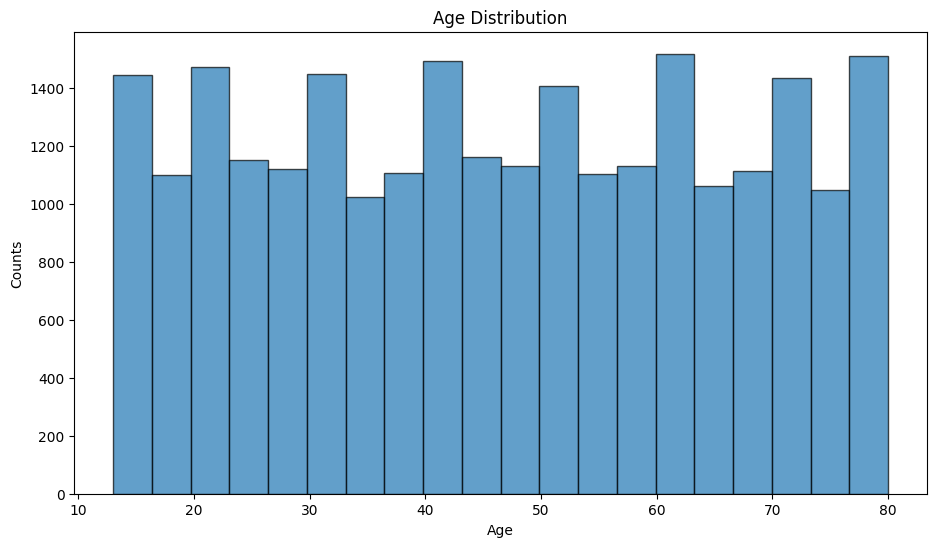

In [ ]:
plt.figure(figsize=(11,6))
plt.hist(df['Age'], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

### Country Column

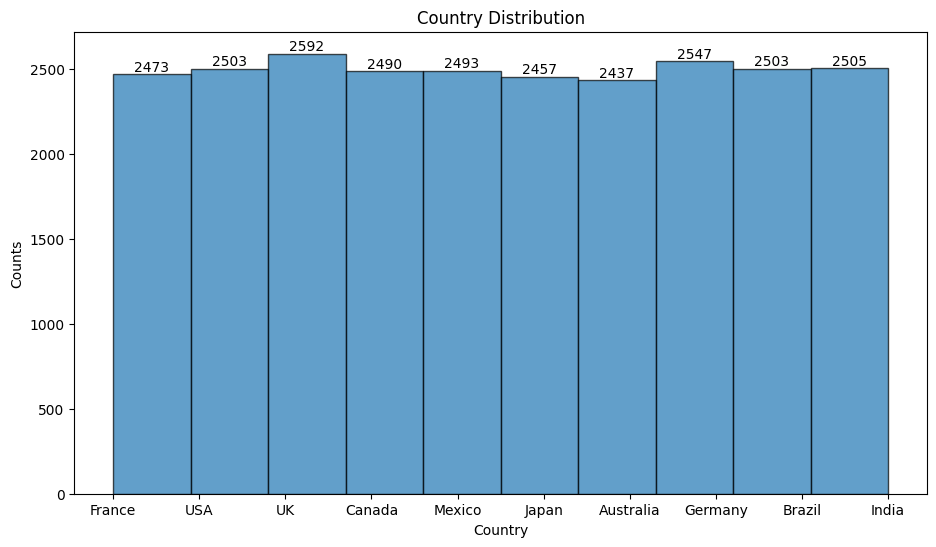

In [ ]:
plt.figure(figsize=(11,6))
plt.hist(df['Country'], edgecolor="black", alpha=0.7)
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Country Distribution')

# Showing the individual data values on the bars
bar = plt.gca().containers[0]
plt.bar_label(bar)

plt.show()

### Favorite_Genre Column

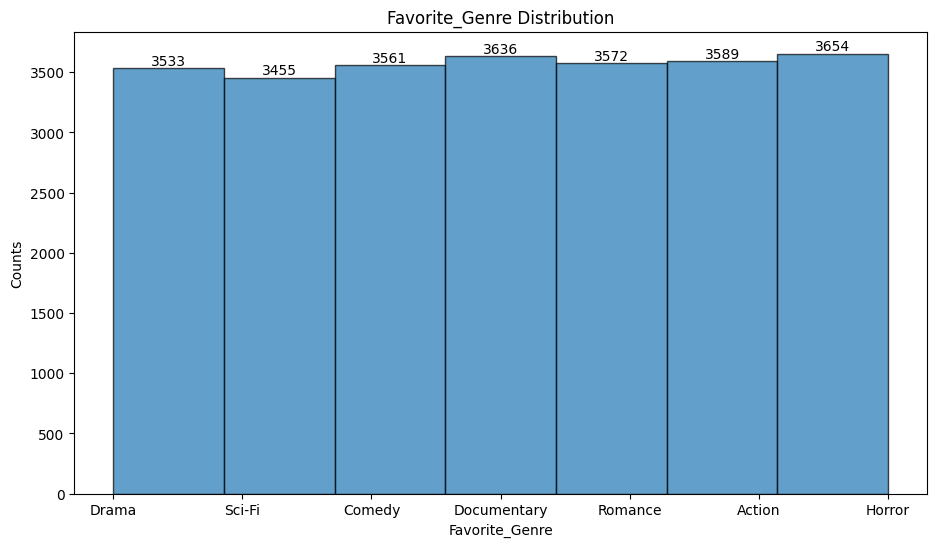

In [ ]:
plt.figure(figsize=(11,6))
plt.hist(df['Favorite_Genre'], bins=7, edgecolor="black", alpha=0.7)
plt.xlabel('Favorite_Genre')
plt.ylabel('Counts')
plt.title('Favorite_Genre Distribution')

# Showing the individual data values on the bars
bar = plt.gca().containers[0]
plt.bar_label(bar)

plt.show()

### Subscription_Type Column

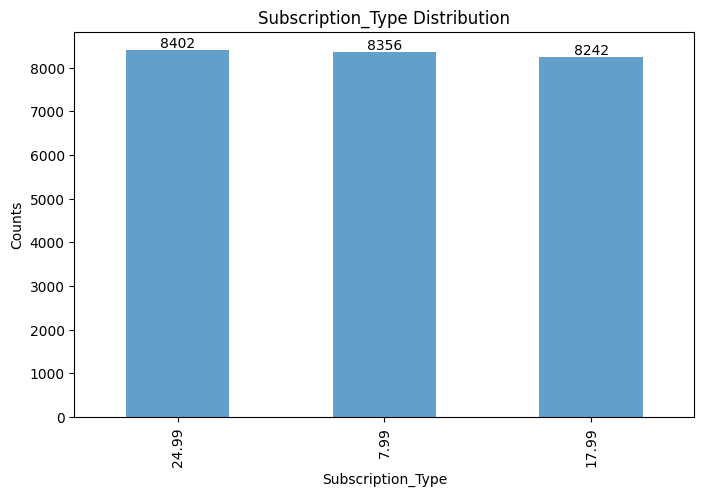

In [ ]:
plt.figure(figsize=(8,5))
df['Subscription_Type'].value_counts().plot(kind='bar', alpha=0.7)
plt.xlabel('Subscription_Type')
plt.ylabel('Counts')
plt.title('Subscription_Type Distribution')

bar = plt.gca().containers[0]
plt.bar_label(bar)

plt.show()

## Patterns

### Summaries

In [ ]:
# Checking groupby summary of Subscription_Type
df.groupby('Subscription_Type')[['Age', 'Watch_Time_Hours', 'Weeks_since_login']].mean()

,Age,Watch_Time_Hours,Weeks_since_login
Subscription_Type,,,
7.99,46.349689,502.994617,181.922212
17.99,46.541373,496.949376,179.641713
24.99,46.557962,501.409387,183.926208


In [ ]:
df.groupby('Churn')[['Age', 'Watch_Time_Hours', 'Weeks_since_login']].mean()

,Age,Watch_Time_Hours,Weeks_since_login
Churn,,,
0,47.294308,497.513262,15.306340
1,46.406104,500.748513,197.601471


### Relationships

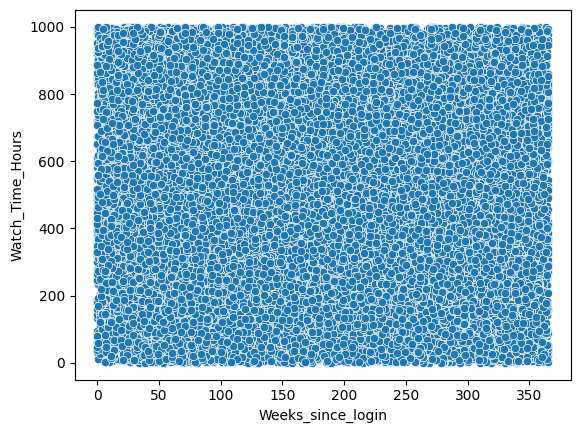

In [ ]:
sns.scatterplot(x=df['Weeks_since_login'], y=df['Watch_Time_Hours'])
plt.show()
# Scatterplot is not showing any relationship between continuous variables.

In [ ]:
# Correlation of numerical columns
df[['Age', 'Watch_Time_Hours', 'Weeks_since_login']].corr(method='pearson')

,Age,Watch_Time_Hours,Weeks_since_login
Age,1.000000,0.007981,-0.010946
Watch_Time_Hours,0.007981,1.000000,-0.008463
Weeks_since_login,-0.010946,-0.008463,1.000000


### Crosstab

In [ ]:
# Using CROSSTAB (helps in building frequency table between two or more categorical variables)
pd.crosstab(df['Subscription_Type'], df['Churn'], normalize='index')

# Shows the total proprotion (0-1) of subscription types w.r.t churn and non-churn

Churn,0,1
Subscription_Type,,
7.99,0.089038,0.910962
17.99,0.088449,0.911551
24.99,0.081885,0.918115


In [ ]:
# normalizing Churn between 0-1
pd.crosstab(df['Churn'], df['Subscription_Type'], normalize='index')

Subscription_Type,7.99,17.99,24.99
Churn,,,
0,0.344285,0.337344,0.318371
1,0.333290,0.328955,0.337756


**Note: `Subscription_Type` does not differentiate churn rate at all since it is nearly 91% across all plans and mix of churners and non-churners is also nearly identical across plans (~33%)**

# Preprocessing

## Dropping columns

In [ ]:
df.drop(['User_ID', 'Name', 'Last_Login'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Weeks_since_login,Churn
0,18,France,24.99,80.26,Drama,300,1
1,23,USA,24.99,321.75,Sci-Fi,31,1
2,60,UK,7.99,35.89,Comedy,43,1
3,44,USA,24.99,261.56,Documentary,348,1
4,68,USA,17.99,909.30,Drama,53,1


## Train Test Split

In [ ]:
x = df.drop(['Churn'], axis=1)
y= df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20000, 6), (5000, 6), (20000,), (5000,))

## Scaling and Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encode = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

transformer = ColumnTransformer(
    transformers = [
        ('numeric', scaler, ['Age', 'Subscription_Type', 'Watch_Time_Hours']),
        ('categoric', encode, ['Country', 'Favorite_Genre'])
    ],
    remainder = 'passthrough'
)

In [ ]:
x_train_trans = transformer.fit_transform(x_train)
x_test_trans = transformer.transform(x_test)
x_train_trans.shape, x_test_trans.shape

((20000, 19), (5000, 19))

In [ ]:
dataset = pd.DataFrame(x_train_trans)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.383608,0.139659,1.191243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,207.0
1,1.606418,-1.292593,-1.026768,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0
2,0.789997,-1.292593,0.062304,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
3,-0.536687,-1.292593,0.698015,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,239.0
4,-0.842845,-1.292593,-1.146369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,124.0


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_res, y_train_res = smote.fit_resample(x_train_trans, y_train)

x_train_res.shape, y_train_res.shape

((36584, 19), (36584,))

# Modeling

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(x_train_res, y_train_res)

y_pred = logreg.predict(x_test_trans)

In [ ]:
logreg.coef_

array([[-0.11596437,  0.03202148,  0.12031358,  0.57807572,  0.1286091 ,
        -0.35383292,  0.10464329,  0.05571181,  0.39783498,  0.26471238,
        -0.13250546,  0.36207441,  0.18169301,  0.43790197,  0.62182715,
        -0.23803163,  1.32168168,  0.59534584,  4.58365732]])

In [ ]:
logreg.intercept_

array([-141.63576563])

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

**Classification Report**

In [ ]:
report = classification_report(y_test, y_pred)
print (report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00      4547

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 453,    0],
       [   0, 4547]])

**ROC_AUC Score**

In [ ]:
roc_auc_score(y_test, y_pred)

np.float64(1.0)

In [ ]:
numeric_cols = ['Age', 'Subscription_Type', 'Watch_Time_Hours']
categoric_cols = ['Country', 'Favorite_Genre']
passthrough_cols = ['days_since_login']

# Get categorical feature names exactly as OneHotEncoder produces them
ohe_cols = transformer.named_transformers_['categoric'].get_feature_names_out(categoric_cols)

# Concatenate numeric and OHE in the **same order as ColumnTransformer outputs**
all_feature_names = np.concatenate([numeric_cols, ohe_cols, passthrough_cols])

# Now assign to rf.feature_importances_
importances = pd.Series(logreg.coef_[0], index=all_feature_names).sort_values(ascending=False)
print(importances)

days_since_login              4.583657
Favorite_Genre_Romance        1.321682
Favorite_Genre_Drama          0.621827
Favorite_Genre_Sci-Fi         0.595346
Country_Brazil                0.578076
Favorite_Genre_Documentary    0.437902
Country_Japan                 0.397835
Country_USA                   0.362074
Country_Mexico                0.264712
Favorite_Genre_Comedy         0.181693
Country_Canada                0.128609
Watch_Time_Hours              0.120314
Country_Germany               0.104643
Country_India                 0.055712
Subscription_Type             0.032021
Age                          -0.115964
Country_UK                   -0.132505
Favorite_Genre_Horror        -0.238032
Country_France               -0.353833
dtype: float64


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtclas = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dtclas.fit(x_train_res, y_train_res)

y_pred_dt = dtclas.predict(x_test_trans)

**Classification Report**

In [ ]:
report_dt = classification_report(y_test, y_pred_dt)
print (report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00      4547

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred_dt)

array([[ 453,    0],
       [   0, 4547]])

**ROC_AUC Score**

In [ ]:
roc_auc_score(y_test, y_pred_dt)

np.float64(1.0)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclas = RandomForestClassifier(class_weight='balanced', random_state=42)
# with the default parameters

rfclas.fit(x_train_res, y_train_res)

y_pred_rf = rfclas.predict(x_test_trans)

**Classification Report**

In [ ]:
report_rf = classification_report(y_test, y_pred_rf)
print (report_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       453
           1       1.00      1.00      1.00      4547

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[ 453,    0],
       [   0, 4547]])

**ROC_AUC Score**

In [ ]:
roc_auc_score(y_test, y_pred_rf)

np.float64(1.0)

**Feature Importances**

In [ ]:
numeric_cols = ['Age', 'Subscription_Type', 'Watch_Time_Hours']
categoric_cols = ['Country', 'Favorite_Genre']
passthrough_cols = ['days_since_login']

# Get categorical feature names exactly as OneHotEncoder produces them
ohe_cols = transformer.named_transformers_['categoric'].get_feature_names_out(categoric_cols)

# Concatenate numeric and OHE in the **same order as ColumnTransformer outputs**
all_feature_names = np.concatenate([numeric_cols, ohe_cols, passthrough_cols])

# Now assign to rf.feature_importances_
importances = pd.Series(rfclas.feature_importances_, index=all_feature_names).sort_values(ascending=False)
print(importances)

days_since_login              0.884453
Country_USA                   0.015891
Country_Japan                 0.011996
Country_Germany               0.011743
Subscription_Type             0.011290
Country_India                 0.010230
Favorite_Genre_Drama          0.007176
Country_Brazil                0.006748
Favorite_Genre_Romance        0.005581
Country_Canada                0.004651
Favorite_Genre_Documentary    0.004575
Favorite_Genre_Horror         0.004091
Favorite_Genre_Comedy         0.003948
Favorite_Genre_Sci-Fi         0.003360
Age                           0.003268
Country_UK                    0.003251
Watch_Time_Hours              0.003145
Country_Mexico                0.002914
Country_France                0.001689
dtype: float64


# Validation

In [ ]:
model_results = []

# Logistic Regression Metrics
lr_metrics = {
    'Model': 'Logistic Regression',
    'Precision': 0.87,
    'Recall': 1.00,
    'F1-Score': 0.93,
    'ROC-AUC Score': 0.992
}
model_results.append(lr_metrics)

# Decision Tree Metrics
dt_metrics = {
    'Model': 'Decision Tree',
    'Precision': 0.87,
    'Recall': 1.00,
    'F1-Score': 0.93,
    'ROC-AUC Score': 1.0
}
model_results.append(dt_metrics)

# Random Forest Metrics
rf_metrics = {
    'Model': 'Random Forest',
    'Precision': 1.00,
    'Recall': 1.00,
    'F1-Score': 1.00,
    'ROC-AUC Score': 1.0
}
model_results.append(rf_metrics)

results = pd.DataFrame(model_results)
results

,Model,Precision,Recall,F1-Score,ROC-AUC Score
0,Logistic Regression,0.87,1.0,0.93,0.992
1,Decision Tree,0.87,1.0,0.93,1.000
2,Random Forest,1.00,1.0,1.00,1.000


# Probability OR Conversion

In [ ]:
coef = 4.583657
odds_increase = (np.exp(coef) - 1) * 100
print(odds_increase)
# still not clear.....

# GPT: transform the output into bracket of 10 days such as 10 days inactive = 15%, 20 days inactive = 65% and so on OR
#      transform days into bins of categorical labels such as 0-7 days, 8-14, 15-30, 31+

9687.165720389983


In [ ]:
coeff = 4.583657
odds_ratio = np.exp(coef)
print (odds_ratio)

97.87165720389983


In [ ]:
import numpy as np

def churn_prob(intercept, coef, days_list):

  result = {}

  for n in days_list:
    z = intercept + coef * n
    odds = np.exp(z)
    prob = odds / (1 + odds)
    result[n] = prob

  return result

In [ ]:
import numpy as np

def churn_probability(intercept, coef, days_list):
    """
    Compute churn probabilities for given days since login.

    intercept : float (β0 from logistic regression)
    coef      : float (β1 for 'days since login')
    days_list : list of integers (days to evaluate, e.g. [7,14,30])
    """
    OR = np.exp(coef)               # odds ratio per day
    odds0 = np.exp(intercept)       # baseline odds at 0 days
    results = {}

    for n in days_list:
        odds_n = odds0 * (OR ** n)  # scaled odds   WHY SCALED THE ODDS?
        p_n = odds_n / (1 + odds_n) # convert odds → probability
        results[n] = p_n

    return results


# Example usage
intercept = -141.63576563   # baseline ~10% churn at day 0
coef = 4.583657             # per-day coefficient
days_list = [7, 14, 30]

probs = churn_probability(intercept, coef, days_list)

for d, p in probs.items():
    print(f"Day {d}: {p:.2%} churn probability")

Day 7: 0.00% churn probability
Day 14: 0.00% churn probability
Day 30: 1.59% churn probability


**FIND THE LOG ODD (z) USING =intercept + coef*days_list, THEN FIND THE ODDS USING e^z AND THEN odds/1+odds TO FIND THE PERCENTAGE.**

# Model_2

## Standardized days_since_login

In [ ]:
scaler = StandardScaler()
encode = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

transformer_stnd = ColumnTransformer(
    transformers = [
        ('numeric', scaler, ['Age', 'Subscription_Type', 'Watch_Time_Hours', 'Weeks_since_login']),
        ('categoric', encode, ['Country', 'Favorite_Genre'])
    ]
)

In [ ]:
x_train_trans_stnd = transformer_stnd.fit_transform(x_train)
x_test_trans_stnd = transformer_stnd.transform(x_test)
x_train_trans_stnd.shape, x_test_trans_stnd.shape

((20000, 19), (5000, 19))

In [ ]:
dataset_stnd = pd.DataFrame(x_train_trans_stnd)
dataset_stnd.head()
# col 3 is Days_since_login

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.383608,0.139659,1.191243,0.233438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.606418,-1.292593,-1.026768,-0.976168,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.789997,-1.292593,0.062304,-1.193519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.536687,-1.292593,0.698015,0.535840,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.842845,-1.292593,-1.146369,-0.550916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
logreg_stnd = LogisticRegression(random_state=42)

logreg_stnd.fit(x_train_trans_stnd, y_train)

y_pred_stnd = logreg_stnd.predict(x_test_trans_stnd)

In [ ]:
logreg_stnd.coef_

array([[-2.83240963e-02, -3.74172232e-02,  2.64008082e-02,
         2.12829408e+01, -1.32168770e-02, -8.87873996e-02,
        -3.16096894e-01, -1.70841413e-01, -1.48993505e-02,
         3.99084316e-02, -6.71397721e-02, -1.06994538e-01,
         6.84682227e-02, -1.50411381e-01, -6.33513952e-02,
        -1.12273181e-02,  7.93274078e-02, -2.00555166e-02,
         3.76175956e-02]])

In [ ]:
logreg_stnd.intercept_

array([30.58373544])

In [ ]:
report = classification_report(y_test, y_pred_stnd)
print (report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       453
           1       1.00      1.00      1.00      4547

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [ ]:
confusion_matrix(y_test, y_pred_stnd)

array([[ 450,    3],
       [   4, 4543]])

In [ ]:
roc_auc_score(y_test, y_pred_stnd)

np.float64(0.9962488912710076)

In [ ]:
numeric_cols = ['Age', 'Subscription_Type', 'Watch_Time_Hours', 'days_since_login']
categoric_cols = ['Country', 'Favorite_Genre']

ohe_cols = transformer_stnd.named_transformers_['categoric'].get_feature_names_out(categoric_cols)

all_feature_names = np.concatenate([numeric_cols, ohe_cols])

importances = pd.Series(logreg_stnd.coef_[0], index=all_feature_names).sort_values(ascending=False)
print(importances)

days_since_login              21.282941
Favorite_Genre_Horror          0.079327
Country_USA                    0.068468
Country_Japan                  0.039908
Favorite_Genre_Sci-Fi          0.037618
Watch_Time_Hours               0.026401
Favorite_Genre_Drama          -0.011227
Country_Brazil                -0.013217
Country_India                 -0.014899
Favorite_Genre_Romance        -0.020056
Age                           -0.028324
Subscription_Type             -0.037417
Favorite_Genre_Documentary    -0.063351
Country_Mexico                -0.067140
Country_Canada                -0.088787
Country_UK                    -0.106995
Favorite_Genre_Comedy         -0.150411
Country_Germany               -0.170841
Country_France                -0.316097
dtype: float64


In [ ]:
intercept = 30.58373544      # baseline ~10% churn at day 0
coef = 21.282941             # per-day coefficient
days_list = [7, 14, 30]

probs = churn_probability(intercept, coef, days_list)

for d, p in probs.items():
    print(f"Day {d}: {p:.2%} churn probability")

Day 7: 100.00% churn probability
Day 14: 100.00% churn probability
Day 30: 100.00% churn probability


# Model_3

## Standardized days_since_login with SMOTE

In [ ]:
smote = SMOTE(random_state=42)

x_train_res_stnd, y_train_res_stnd = smote.fit_resample(x_train_trans_stnd, y_train)

x_train_res_stnd.shape, y_train_res_stnd.shape

((36584, 19), (36584,))

In [ ]:
logreg_stnd_res = LogisticRegression(random_state=42)

logreg_stnd_res.fit(x_train_res_stnd, y_train_res_stnd)

y_pred_stnd_res = logreg_stnd_res.predict(x_test_trans_stnd)

In [ ]:
logreg_stnd_res.coef_

array([[-4.69819843e-02, -4.75242480e-02,  3.52221585e-02,
         3.04708418e+01,  1.78797785e-01,  1.07219860e-01,
        -2.15958176e-01, -1.02605465e-02,  1.50811035e-01,
         2.77554037e-01,  1.85989937e-01,  4.23211721e-03,
         2.52401250e-01,  9.08462412e-02,  1.31467076e-01,
         2.48094855e-01,  3.36198303e-01,  3.02040644e-01,
         3.06636412e-01]])

In [ ]:
logreg_stnd_res.intercept_

array([42.01387296])

In [ ]:
report = classification_report(y_test, y_pred_stnd_res)
print (report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       453
           1       1.00      0.98      0.99      4547

    accuracy                           0.99      5000
   macro avg       0.93      0.99      0.96      5000
weighted avg       0.99      0.99      0.99      5000



In [ ]:
numeric_cols = ['Age', 'Subscription_Type', 'Watch_Time_Hours', 'days_since_login']
categoric_cols = ['Country', 'Favorite_Genre']

ohe_cols = transformer_stnd.named_transformers_['categoric'].get_feature_names_out(categoric_cols)

all_feature_names = np.concatenate([numeric_cols, ohe_cols])

importances = pd.Series(logreg_stnd_res.coef_[0], index=all_feature_names).sort_values(ascending=False)
print(importances)

days_since_login              30.470842
Favorite_Genre_Horror          0.336198
Favorite_Genre_Sci-Fi          0.306636
Favorite_Genre_Romance         0.302041
Country_Japan                  0.277554
Country_USA                    0.252401
Favorite_Genre_Drama           0.248095
Country_Mexico                 0.185990
Country_Brazil                 0.178798
Country_India                  0.150811
Favorite_Genre_Documentary     0.131467
Country_Canada                 0.107220
Favorite_Genre_Comedy          0.090846
Watch_Time_Hours               0.035222
Country_UK                     0.004232
Country_Germany               -0.010261
Age                           -0.046982
Subscription_Type             -0.047524
Country_France                -0.215958
dtype: float64


In [ ]:
intercept = 42.01387296      # baseline ~10% churn at day 0
coef = 30.470842             # per-day coefficient
days_list = [7, 14, 30]

probs = churn_probability(intercept, coef, days_list)

for d, p in probs.items():
    print(f"Day {d}: {p:.2%} churn probability")

Day 7: 100.00% churn probability
Day 14: 100.00% churn probability
Day 30: nan% churn probability


/tmp/ipython-input-1999347650.py:16: RuntimeWarning: overflow encountered in scalar power
  odds_n = odds0 * (OR ** n)  # scaled odds
/tmp/ipython-input-1999347650.py:17: RuntimeWarning: invalid value encountered in scalar divide
  p_n = odds_n / (1 + odds_n) # convert odds → probability


# Verdict

Though the model metrics are good, they relay an important insight into model overfitting due to high coefficients and intercept. Another finding from this project was that the logic used to create the target column is a form of data leakage that resulted in unrealistic results. The logic for creating the target is essentially just an IF-ELSE statement that the model describes instead of predicting it--which is why the coefficient for `days_since_login` is so large.  